# **Lab One - Project Description**

Names? UwU (づ｡◕‿‿◕｡)づ (づ｡◕‿‿◕｡)づ (づ｡◕‿‿◕｡)づ

# **Business Understanding (1.5)**

[1.5 points] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
Be specific and use your own words to describe the aspects of the data.

## **Data Understanding (3)**

[1.5 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  
[1.5 points] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  


In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

# Read CSV File (Load Dataset)
ldData = pd.read_csv('Dataset/Loan_Default.csv')

# Make Sure Data > 1K Rows
print("Shape:", ldData.shape)

# Print Head (5 Rows)
ldData.head()

Pandas: 2.0.3
Numpy: 1.25.2
Shape: (148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [2]:
# Check Data Summary
ldData.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
# Check Data Types
print(ldData.dtypes)

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [7]:
# Print Columns, Rows
print(ldData.info)

<bound method DataFrame.info of             ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
2        24892  2019         cf               Male           pre     type1   
3        24893  2019         cf               Male         nopre     type1   
4        24894  2019         cf              Joint           pre     type1   
...        ...   ...        ...                ...           ...       ...   
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Wort

In [53]:
# Print Unique Values For Each Column
for col in ldData[ldData.nunique()[ldData.nunique() < 10].keys()]:
    print(col, ":", ldData[col].unique())

# Note: Need To Evict Nan Values

year : [2019]
loan_limit : ['cf' nan 'ncf']
Gender : ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv : ['nopre' 'pre' nan]
loan_type : ['type1' 'type2' 'type3']
loan_purpose : ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness : ['l1' 'l2']
open_credit : ['nopc' 'opc']
business_or_commercial : ['nob/c' 'b/c']
Neg_ammortization : ['not_neg' 'neg_amm' nan]
interest_only : ['not_int' 'int_only']
lump_sum_payment : ['not_lpsm' 'lpsm']
construction_type : ['sb' 'mh']
occupancy_type : ['pr' 'sr' 'ir']
Secured_by : ['home' 'land']
total_units : ['1U' '2U' '3U' '4U']
credit_type : ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type : ['CIB' 'EXP']
age : ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
submission_of_application : ['to_inst' 'not_inst' nan]
Region : ['south' 'North' 'central' 'North-East']
Security_Type : ['direct' 'Indriect']
Status : [1 0]


In [57]:
# Print Unique Values For Each Column
for col in ldData[ldData.nunique()[ldData.nunique() >= 10].keys()]:
    print(col, ":", ldData[col].nunique())

# Note: Check Outliers (There Are Many)

ID : 148670
loan_amount : 211
rate_of_interest : 131
Interest_rate_spread : 22516
Upfront_charges : 58271
term : 26
property_value : 385
income : 1001
Credit_Score : 401
LTV : 8484
dtir1 : 57


In [59]:
# Remove Irrelevant Columns
for col in ['ID', 'year']:
    if col in ldData:
        del ldData[col]

## **Questions we might want to ask:**
- Which Columns Should Be Converted To One Hot
- Which Columns Should Be Removed
- Classification: Will Loan Borrower Default or Not

In [10]:
# Find Columns with Missing Values
ldData.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [14]:
# Check Frequency Feature Values In Columns
ldData['open_credit'].value_counts()

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

In [18]:
continious_cols=[col for col in ldData.columns if ldData[col].dtype == "float64"]
print(continious_cols)
ldData[continious_cols]

['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']


,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1
0,NaN,NaN,NaN,360.0,118000.0,1740.0,98.728814,45.0
1,NaN,NaN,NaN,360.0,NaN,4980.0,NaN,NaN
2,4.560,0.2000,595.00,360.0,508000.0,9480.0,80.019685,46.0
3,4.250,0.6810,NaN,360.0,658000.0,11880.0,69.376900,42.0
4,4.000,0.3042,0.00,360.0,758000.0,10440.0,91.886544,39.0
...,...,...,...,...,...,...,...,...
148665,3.125,0.2571,9960.00,180.0,608000.0,7860.0,71.792763,48.0
148666,5.190,0.8544,0.00,360.0,788000.0,7140.0,74.428934,15.0
148667,3.125,0.0816,1226.64,180.0,728000.0,6900.0,61.332418,49.0
148668,3.500,0.5824,4323.33,180.0,278000.0,7140.0,70.683453,29.0


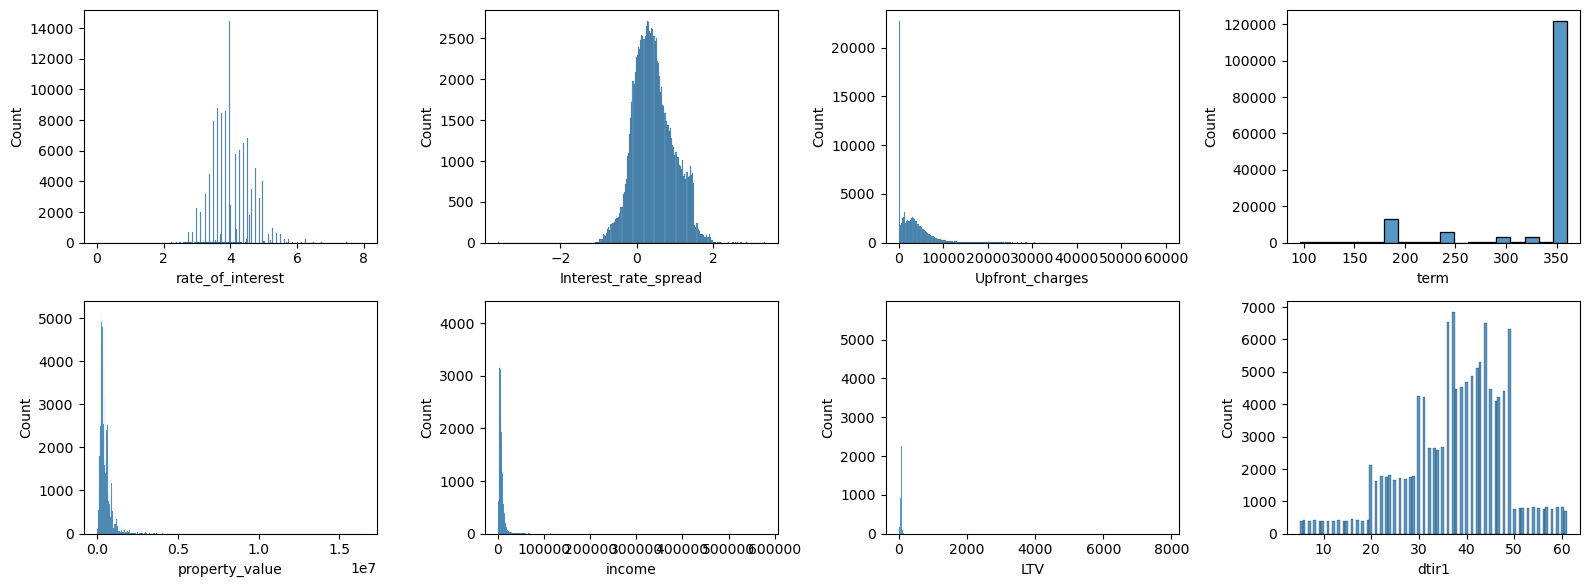

In [19]:
import seaborn as sns

indexes=[]
for i in range(2):
    for j in range(4):
        indexes.append([i,j])
# Create a figure with a single row and multiple columns
fig, axes = plt.subplots(ncols=4,nrows=2,figsize=(16, 6))

for l in range(len(continious_cols)):
    sns.histplot(data=ldData,x=str(continious_cols[l]),ax=axes[indexes[l][0],indexes[l][1]])

plt.tight_layout()
plt.show()

## Grouping the Data

In [14]:
# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Pclass')

for val,grp in df_grouped:
    print(f'There were {len(grp)} people traveling in {val} class.')

There were 216 people traveling in 1 class.
There were 184 people traveling in 2 class.
There were 491 people traveling in 3 class.


In [15]:
# an example of using the groupby function with a data column
print(df_grouped['Survived'].sum())
print('---------------------------------------')
print(df_grouped.Survived.count())
print('---------------------------------------')
print(df_grouped.Survived.sum() / df_grouped.Survived.count())

# might there be a better way of displaying this data?

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
---------------------------------------
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Class Exercise 📝: 

In [16]:
# Class Exercise: Create code for calculating the std error
# std / sqrt(N) 


___________
# Cleaning the Dataset
Let's start by visualizing some of the missing data in this dataset. We will use the `missingno` package to help visualize where the data contains `NaNs`. This is a great tool for looking at nan values and how we might go about filling in the values. 

For this visualization, we can use a visualization library called `missingno` that hs many types of visuals for looking at missing data in a dataframe. I particularly like the `matrix` visualization, but there are many more to explore:
- https://github.com/ResidentMario/missingno

### Plot Type One: Filter Bar

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

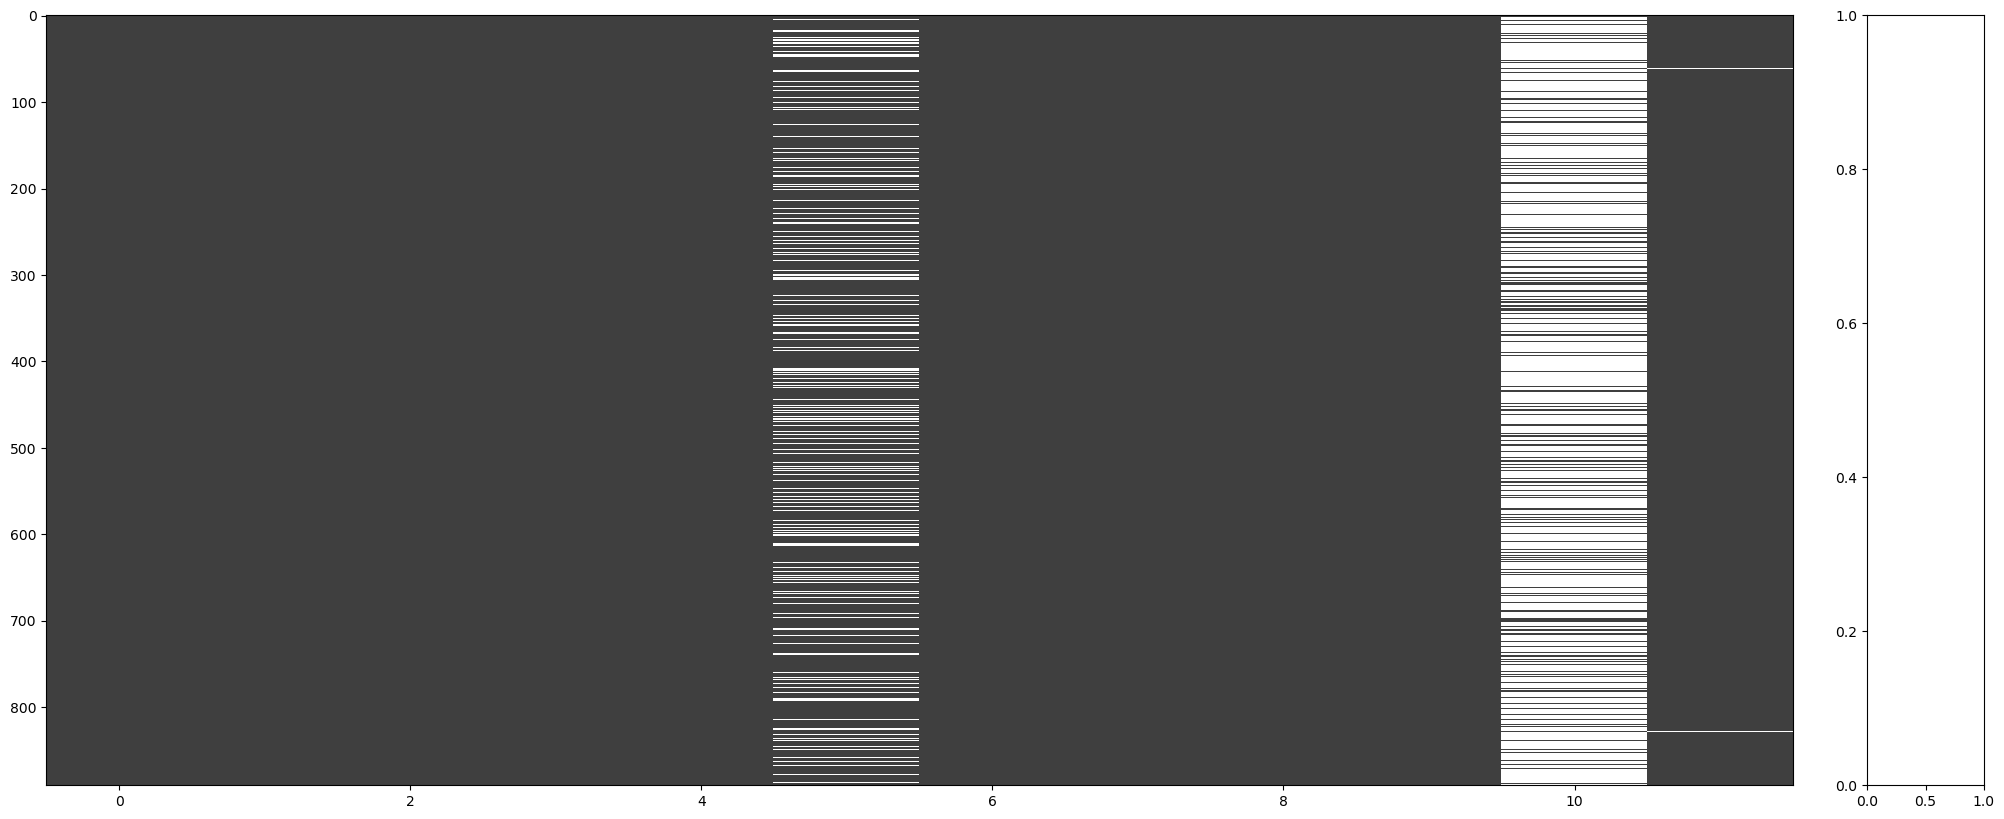

In [17]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["Cabin","Age"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [18]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['PassengerId','Name','Cabin','Ticket']:
    if col in df:
        del df[col]
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Imputation Techniques 
Let's compare two different techniques from lecture on how to fill in missing data. Recall that imputation should be done with a great deal of caution. Here, the Age variable seems to be missing about 15% of the values. That might be too many to impute. Let's try two methods of imputation on the Age variable: 
- Split-Imput-Combine (SIC)
- K-Nearest Neighbor Imputation (KNN)

**Self Test ML2a.0** 
What is a difference between the Split-Impute-Combine (SIC) Technique and the K-Nearest Neighbor (KNN) Imputation Technique:
- SIC imputes values based on distances, KNN does not
- SIC uses discrete groupings of instances, KNN does not
- KNN does not use statistics like median, mode, or mean to fill in values, SIC does
- There is no difference in the two techniques 

### Split-Impute-Combine in Pandas

In [19]:
# This code is for split, impute, combine
#     let's clean the dataset a little before moving on


# Impute some missing values, grouped by their Pclass and SibSp numbers, 
# then use this grouping to fill the data set in each group, then transform back


df_grouped = df.groupby(by=['Survived','Pclass','SibSp','Parch']) # perform the grouping of thing related to 'age'
func = lambda grp: grp.fillna(grp.mean()) # within groups, fill using median (define function to do this)
numeric_columns = ['Survived','Age','Parch','SibSp','Pclass','Fare'] # only transform numeric columns
df_imputed_sic = df_grouped[numeric_columns].transform(func) # apply impute and transform the data back

# Extra step: fill any object columns that could not be transformed
col_deleted = list( set(df.columns) - set(df_imputed_sic.columns)) # in case the median operation deleted columns
df_imputed_sic[col_deleted] = df[col_deleted]

# drop any rows that still had missing values after grouped imputation
df_imputed_sic.dropna(inplace=True)

# 5. Rearrange the columns
df_imputed_sic = df_imputed_sic[['Survived','Age','Sex','Parch','SibSp','Pclass','Fare','Embarked']]
df_imputed_sic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  880 non-null    int64  
 1   Age       880 non-null    float64
 2   Sex       880 non-null    object 
 3   Parch     880 non-null    int64  
 4   SibSp     880 non-null    int64  
 5   Pclass    880 non-null    int64  
 6   Fare      880 non-null    float64
 7   Embarked  880 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.9+ KB


### Nearest Neighbor Imputation with Scikit-learn
Now let's try to fill in the Age variable by selecting the 3 nearest data points to the given observation. Here, we can use additional variables in the distance calculation, as compared to the need for discrete variable in the split-impute-combine method. 

In [20]:
# impute based upon the K closest samples (rows)
# our first introduction to sklearn!!!
from sklearn.impute import KNNImputer
import copy

# get object for imputation
knn_obj = KNNImputer(n_neighbors=3)

features_to_use = ['Pclass','Age','SibSp','Parch','Fare','Survived']

# create a numpy matrix from pandas numeric values to impute
temp = df[features_to_use].to_numpy()

# use sklearn imputation object
knn_obj.fit(temp) # fit the object
temp_imputed = knn_obj.transform(temp) # transform all mssing data
#    could have also done:
# temp_imputed = knn_obj.fit_transform(temp)

# this is VERY IMPORTANT, make a deep copy, not just a reference to the object
# otherwise both data frames will be manipulated
df_imputed = copy.deepcopy(df) # not just an alias
df_imputed[features_to_use] = temp_imputed
df_imputed.dropna(inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(6), object(2)
memory usage: 62.5+ KB


In [21]:
# properties of the imputer after fitting
print(knn_obj.n_features_in_)

6


### Comparing Imputation Distributions 
Now let's see whihc imputation method changed the overall histogram the least. **Do you see anything in the plots below that would give preference in one method over another?**

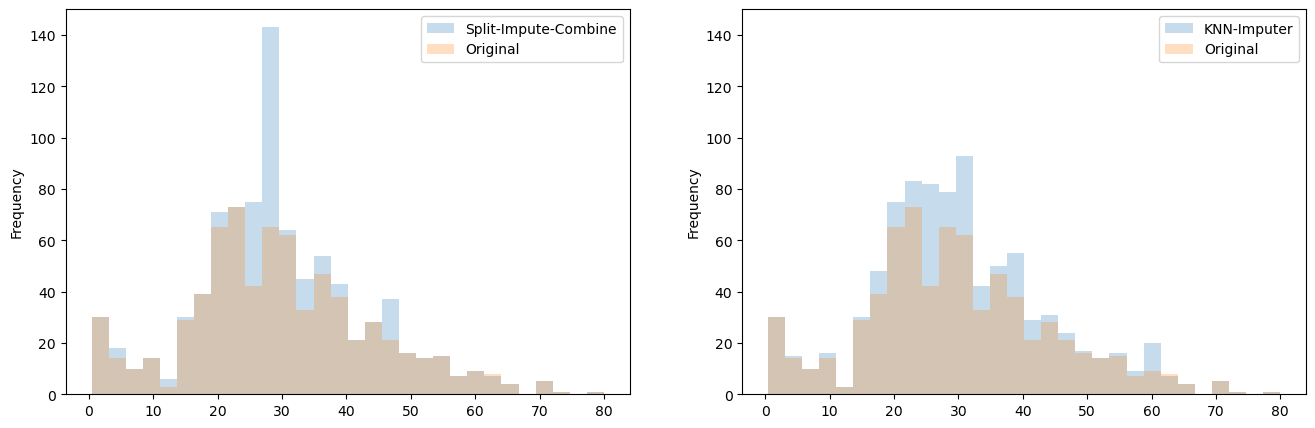

In [22]:
# let's show some very basic plotting to be sure the data looks about the same
# Which imputation did better? The Split-Apply-Combine, or Nearest Neighbor Imputer? 
f = plt.figure(figsize=(16,5))

bin_num = 30
plt.subplot(1,2,1)
df_imputed_sic.Age.plot(kind='hist', alpha=0.25, 
                        label="Split-Impute-Combine",
                        bins=bin_num)

df.Age.plot(kind='hist', alpha=0.25, 
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.ylim([0, 150])

plt.subplot(1,2,2)
df_imputed.Age.plot(kind='hist', alpha=0.25, 
                        label="KNN-Imputer",
                        bins=bin_num)

df.Age.plot(kind='hist', alpha=0.25, 
                        label="Original",
                        bins=bin_num)
plt.legend()
plt.ylim([0, 150])

plt.show()

________________
**[End of Demo for Data Quality Lecture]**

**[Back to Slides]**

**[Start Visualization Lecture]**

# Feature Discretization
This is an example of how to make a continuous feature and ordinal feature. Let's try to give some human intuition to a variable by grouping the data by age. 

**Question: Does age range influence survival rates?**

In [23]:
# let's break up the age variable into a discrete new variable
df_imputed['age_range'] = pd.cut(df_imputed['Age'],
                                 [0,4,13,19,35,1e6],
                                 labels=['toddler','child','teen','adult','elder']) # this creates a new variable
df_imputed.age_range.describe()

count       889
unique        5
top       adult
freq        448
Name: age_range, dtype: object

In [25]:
# now lets group with the new variable
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
print ("Percentage of survivors in each group:")
print (df_grouped.Survived.sum() / df_grouped.Survived.count() *100)
df_grouped.Survived.count()

Percentage of survivors in each group:
Pclass  age_range
1.0     toddler       66.666667
        child        100.000000
        teen          82.352941
        adult         75.000000
        elder         52.800000
2.0     toddler      100.000000
        child        100.000000
        teen          47.058824
        adult         42.857143
        elder         37.254902
3.0     toddler       52.000000
        child         37.037037
        teen          34.285714
        adult         23.404255
        elder          6.896552
Name: Survived, dtype: float64


Pclass  age_range
1.0     toddler        3
        child          1
        teen          17
        adult         68
        elder        125
2.0     toddler       12
        child          6
        teen          17
        adult         98
        elder         51
3.0     toddler       25
        child         27
        teen          70
        adult        282
        elder         87
Name: Survived, dtype: int64

__________
___________
# Visualization in Python with Pandas, Matplotlib, and Others

In [26]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)
# could also say "%matplotlib notebook" here to make things interactive
# but in my expereince, this is a littel buggy and won't save the 
# HTML of the visual proper;y

Matplotlib: 3.7.1


___________
## Visualizing the dataset

Pandas has plenty of plotting abilities built in. Let's take a look at a few of the different graphing capabilities of Pandas with only matplotlib. Afterward, we can make the visualizations more beautiful.

### Visualization Techniques: Distributions
- Histogram 
 - Usually shows the distribution of values of a single variable
 - Divide the values into bins and show a bar plot of the number of objects in each bin. 
- Kernel Density Estimation
 - Add up Gaussian underneath each point value
 - STD of gaussian is visually related to "number of bins" for a histogram
 
 **KDE Example:** 
 <img src="PDF_slides/kernels.gif" alt="TukeyBoxplot" width="400" height="400" loading="lazy">
 
 ___
 
 
 #### Plot Type Two: Histogram and Kernel Density
 
 **Question: What were the ages of people on the Titanic?**

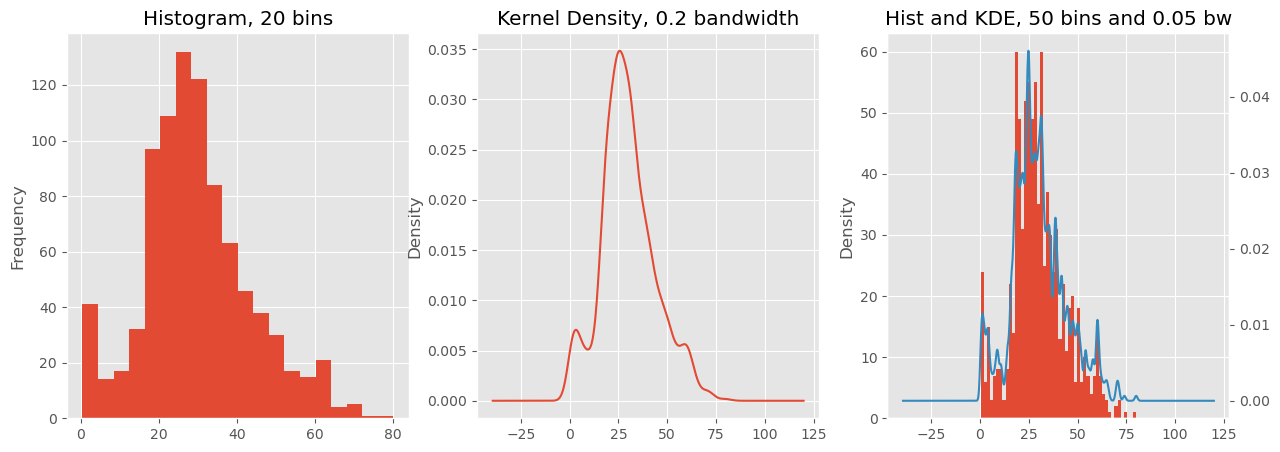

In [27]:
# Start by just plotting what we previously grouped!
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df_imputed.Age.plot.hist(bins=20)
plt.title('Histogram, 20 bins')

plt.subplot(1,3,2)
df_imputed.Age.plot.kde(bw_method=0.2)
plt.title('Kernel Density, 0.2 bandwidth')

plt.subplot(1,3,3)
df_imputed.Age.plot.hist(bins=50)
df_imputed.Age.plot.kde(bw_method=0.05, secondary_y=True)
plt.title('Hist and KDE, 50 bins and 0.05 bw')

# remember that visualization is interpretted, it supports evidence.
# plt.ylim([0, 0.06])

plt.show()

In [ ]:
from ipywidgets import widgets  # make this interactive!

def plot_kde(bw):
    df_imputed.Age.plot.kde(bw_method=bw)
    plt.title(f"Bandwidth = {bw:.2f}")
    
widgets.interact(plot_kde, bw=(0.01, 0.51, 0.05), __manual=True) 

### Two-Dimensional Distributions
- Estimate the joint distribution of the values of two attributes 
 - Example: petal width and petal length
  - What does this tell us? 
  
 **Question: How does age relate to the fare that was paid?**

In [ ]:
plt.hist2d(x=df_imputed.Age, y=df_imputed.Fare, bins=30)
plt.colorbar()
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

The above plot is not all that meaningful. We can probably do better than visualizing the joint distribution using 2D histograms. Let's face it: 2D histrogram are bound to be sparse and not very descriptive. Instead, let's do something smarter.

## Feature Correlation Plot
 - First lets visualize the correlation between the different features.
 
  #### Plot Type Three: Heatmap (of correlation)

In [ ]:
# plot the correlation matrix 
vars_to_use = ['Survived', 'Age', 'Parch', 'SibSp', 'Pclass', 'Fare'] # pick vars
plt.pcolor(df_imputed[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

### Grouped Count Plots
Used when you have multiple categorical or nominal variables that you want to show together in sub-groups. Grouping mean to display the counts of different subgroups on the dataset. For the titanic data, this can be quite telling of the dataset.

**Question: Does age, gender, or class have an effect on survival?**

 #### Plot Type Four: Grouped Bar Chart

In [ ]:
# first group the data
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])

# tabulate survival rates of each group
survival_rate = df_grouped.Survived.sum() / df_grouped.Survived.count()

# show in a bar chart using builtin pandas API
ax = survival_rate.plot(kind='barh')
plt.title('Survival Percentages by Class and Age Range')
plt.show()

In [ ]:
# the cross tab operator provides an easy way to get these numbers
survival = pd.crosstab([df_imputed['Pclass'],
                        df_imputed['age_range']], # categories to cross tabulate
                       df_imputed.Survived.astype(bool)) # how to group
print(survival)

survival.plot(kind='barh', stacked=True)
plt.show()

In [ ]:
# plot overall cross tab with both groups
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

pd.crosstab([df_imputed['Pclass']], # categories to cross tabulate
            df_imputed.Survived.astype(bool)).plot(kind='bar', stacked=True, ax=ax1) 

pd.crosstab([df_imputed['age_range']], # categories to cross tabulate
            df_imputed.Survived.astype(bool)).plot(kind='bar', stacked=True, ax=ax2) 

pd.crosstab([df_imputed['Sex']], # categories to cross tabulate
            df_imputed.Survived.astype(bool)).plot(kind='bar', stacked=True, ax=ax3) 

plt.show()

### Sub-group Distribution Plots
- Box Plots 
 - Invented by J. Tukey
 - Another way of displaying the distribution of data 
 - Following figure shows the basic part of a box plot:
 
<img src="data/TukeyPlot.png" alt="TukeyBoxplot" width="600" height="600">

 #### Plot Type Five: Box Plot

In [ ]:
ax = df_imputed.boxplot(column='Fare', by = 'Pclass') # group by class
plt.ylabel('Fare')
plt.title('')
# ax.set_yscale('log') # so that the boxplots are not squished

The problem with boxplots is that they might hide important aspects of the ditribution. For example, this plot shows data that all have the exact same boxplot.

<img src="https://i.redd.it/cad7mdrg9wez.gif" alt="TukeyBoxplot" width="600" >

# Simplifying Plotting with Seaborn


Using pandas and matplotlib is great until you need to redo or make more intricate plots. Let's see about one or two APIs that might simplify our lives. First, let's use Seaborn.
+ `import seaborn as sns` 

In seaborn, we have access to a number of different plotting tools. Let's take a look at:
 #### Plot Type Six:
- Box Plots
- Swarm Plots
- Violin Plots

In [ ]:
import seaborn as sns
# cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)
# now try plotting some of the previous plots, way more visually appealing!!

In [ ]:
# sns boxplot
plt.subplots(figsize=(20, 5))

plt.subplot(1,3,1)
sns.boxplot(x="Sex", y="Age", hue="Survived", data=df_imputed)
plt.title('Boxplot Example')

plt.subplot(1,3,2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_imputed)
plt.title('Violin Example')

plt.subplot(1,3,3)
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df_imputed, s=3) # s controls marker size (like bins or bw)
plt.title('Swarm Example')

plt.show()

In [ ]:
if False:
    # ASIDE: UGH so much repeated code, can we do "better"?
    # this uses slick python functionality as the cost of readability
    plt.subplots(figsize=(20, 5))
    args = {'x':"Sex", 'y':"Age", 'hue':"Survived", 'data':df_imputed}
    for i, plot_func in enumerate([sns.boxplot, sns.violinplot, sns.swarmplot]):
        plt.subplot(1,3,i+1)
        plot_func(**args) # more compact, LESS readable

    plt.show()

In [ ]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_imputed, 
               split=True, # split across violins
               inner="quart", # show innner stats like mena, IQR, 
               scale="count") # scale the size of the plot by the count within each group

plt.show()

________


### Self Test 2a.2
<img src="data/self_test_2a_2.png" alt="TukeyBoxplot" width="500" height="500">



____
### Matrix Plots
- Plot some data from a matrix
- This can be useful when objects are sorted well
- Typically, the attributes are normalized to prevent one attribute from dominating the plot
- Plots of similarity or distance matrices can also be useful for visualizing the relationships between objects
- Two versions:
 - Feature Based
 - Instance Based
 
 **Question: Which features are most similar to each other?**

In [ ]:
# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated? 
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_imputed[vars_to_use].corr(), cmap=cmap, annot=True)

# f.tight_layout()


____

**New Question: Which passengers are most similar to one another?**

In [ ]:
# but we could also be asking, what instances are most similar to each other?

# NOTE: Correlation here is defined as a distance metric by scipy 
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.correlation.html 
# it is defined as 1-CC, so '0' means highly correlated

from sklearn.metrics.pairwise import pairwise_distances

vars_to_use = [ 'Age', 'Pclass', 'Fare', 'SibSp','Parch'] # pick vars

xdata = pairwise_distances(df_imputed[vars_to_use].to_numpy(), # get numpy matrix
                           metric='correlation')

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(xdata, cmap=cmap, annot=False)
print('What is wrong with this plot?')

In [ ]:
# lets fix a few things
# first, the difference between each instance was large, 
#  impacted by the biggest variable, Fare

from sklearn.preprocessing import StandardScaler

# lets scale the data to be zero mean, unit variance
std = StandardScaler()

xdata = pairwise_distances(std.fit_transform(df_imputed[vars_to_use].to_numpy()), 
                           metric='correlation')

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(xdata, cmap=cmap, annot=False)
print('Is there still something wrong?')

In [ ]:
# lets scale the data to be zero mean, unit variance
std = StandardScaler()
# and lets also sort the data
df_imputed_copy = df_imputed.copy().sort_values(by=['Pclass','Age'])

xdata = pairwise_distances(std.fit_transform(df_imputed_copy[vars_to_use].to_numpy()), 
                           metric='correlation')

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(xdata, cmap=cmap, annot=False)
print('Is there anything we can conclude?')

______
## Revisiting other Plots in Seaborn

In [ ]:
# can we make a better combined histogram and KDE?
sns.histplot(df_imputed.Age, kde=True)
plt.show()

In [ ]:
# lets make a pretty plot of the scatter matrix
df_imputed_jitter = df_imputed.copy()
df_imputed_jitter[['Parch','SibSp','Pclass']] += np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="Survived", height=2,
            plot_kws=dict(s=20, alpha=0.15, linewidth=0))
plt.show()

# A Final Note on Plotting:
The best plots that you can make are probably ones that are completely custom to the task or question you are trying to solve/answer. These plots are also the most difficult to get correct because they take a great deal of iteration, time, and effort to get perfected. They also take some time to explain. There is a delicate balance between creating a new plot that answers exactly what you are asking (in the best way possible) and spending and inordinate amount of time on a new plot (when a standard plot might be a "pretty good" answer)

<img src="PDF_slides/Customplots.png" alt="TukeyBoxplot" width="600" height="600">


____
# Revisiting with Interactive Visuals: Plotly
- https://plot.ly/python/getting-started/

More updates to come to this section of the notebook. Plotly is a major step in the direction of using JavaScript and python together and I would argue it has a much better implementation than other packages. 

In [ ]:
# directly from the getting started example...
import plotly
print('Plotly:', plotly. __version__)

# to install in your environemtn with conda use: conda install plotly

plotly.offline.init_notebook_mode() # run at the start of every notebook
plotly.offline.iplot({
    "data": [{
        "x": [1, 2, 3],
        "y": [4, 2, 5]
    }],
    "layout": {
        "title": "hello world"
    }
})

In [ ]:
from plotly.graph_objs import Scatter, Layout
from plotly.graph_objs.scatter import Marker
from plotly.graph_objs.layout import XAxis, YAxis
# let's manipulate the example to serve our purposes

# plotly allows us to create JS graph elements, like a scatter object
# we put together a dictionary of plotting elements
# 'data': is the key where we place plotting elements
plotly.offline.iplot({
    'data':[
        # plot siblings and spouses versus age as scatter plot
        # and make mouseover text for if they survived
        # create markers that are sized based on the fare paid
        Scatter(x=df_imputed.SibSp.values+np.random.rand(*df_imputed.SibSp.shape)/2,
                y=df_imputed.Age,
      
                text=df_imputed.Survived.values.astype(str),
                marker=Marker(size=df_imputed.Fare, sizemode='area', sizeref=1,),
                mode='markers')
            ],
    'layout': Layout(xaxis=XAxis(title='Sibling and Spouses'), 
                     yaxis=YAxis(title='Age'),
                     title='Age and Family Size (Marker Size==Fare)')
}, show_link=False)

Visualizing more than three attributes requires a good deal of thought. In the following graph, lets use interactivity to help bolster the analysis. We will create a graph with custom text overlays that help refine the passenger we are looking at. We will 
- color code whether they survived
- Scatter plot Age and Social class
- Code the number of siblings/spouses traveling with them through the size of the marker

In [ ]:
# now we can define our own HTML text for mouseover events on the graph
def get_text(df_row):
    return 'Age: %d<br>Gender: %s<br>Class: %d<br>Fare: %.2f<br>SibSpouse: %d<br>ParChildren: %d'%(df_row.Age,df_row.Sex,df_row.Pclass,df_row.Fare,df_row.SibSp,df_row.Parch)

# and add the text into the pandas dataframe (for easy indexing)
df_imputed['text'] = df_imputed.apply(get_text,axis=1)
textstring = ['Perished','Survived', ]

plotly.offline.iplot({
    'data': [ # creates a list using a comprehension
        # plot class versus age, spearated by survival
        # Marker size is now siblings and spouses
        # Mousover text is now formatted HTML
        Scatter(x=df_imputed.Pclass[df_imputed.Survived==val].values+np.random.rand(*df_imputed.SibSp[df_imputed.Survived==val].shape)/2,
                y=df_imputed.Age[df_imputed.Survived==val],
                text=df_imputed.text[df_imputed.Survived==val].values.astype(str),
                marker=Marker(size=df_imputed[df_imputed.Survived==val].SibSp, sizemode='area', sizeref=0.01,),
                mode='markers',
                name=textstring[val]) for val in [0,1]
    ],
    'layout': Layout(xaxis=XAxis(title='Social Class'), 
                     yaxis=YAxis(title='Age'),
                     title='Age and Class Scatter Plot, Size = number of siblings and spouses'),
    
}, show_link=False)

Check more about using plotly here:
- https://plot.ly/python/ipython-notebook-tutorial/ 

**In this notebook you learned:**
- How to read in from a file using pandas
- How to manipulate data with basic operations in pandas
- How to group data in pandas 
- How to use Scikit-learn and pandas for imputation
- Some common visualizations in Pandas, Seaborn, and Plotly

Want some additional practice?
Try to create and use some Bokeh examples that are similar to the plots we created